# Growth Deployment Calculations
We will think of the need for reactors in terms of their power capacity. When a LWR is retired, it will be replaced by an equivalent capacity of the advanced reactor models considered in the work.

In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib
from collections import defaultdict
matplotlib.use
import matplotlib.pyplot as plt
plt.style.use('../plotting.mplstyle')

In [4]:
import pandas as pd

# Create a sample DataFrame
data = {
    'Year': [2016, 2017, 2018, 2019, 2020],
    'Capacity': [100, 110, 120, 130, 140]
}
df = pd.DataFrame(data)
df.set_index('Year', inplace=True)

# Define parameters
start_year = 2018
end_year = 2021
base_col = 'Capacity'
rate = 1.05

# Create a lambda function for year-to-year capacity change
capacity_change = lambda row: df.loc[start_year, base_col] * (rate)**(row.name - start_year)

# Apply lambda function for the range from start_year to end_year
df.loc[start_year:end_year-1, f"{base_col} Inc {rate}"] = df.loc[start_year:end_year-1].apply(capacity_change, axis=1)

# Directly assign the values from one column to another for the specified range of rows
df.loc[df.index[0]:start_year-1, f"{base_col} Inc {rate}"] = df.loc[df.index[0]:start_year-1, base_col]

# Calculate the new capacity increase
df[f"New Capacity Inc {rate}"] = df[f"{base_col} Inc {rate}"] - df[base_col]

# Expected results
expected_capacity_inc = [100, 110, 120, 120 * 1.05, 120 * 1.05**2]
expected_new_capacity_inc = [0, 0, 0, 120 * 1.05 - 130, 120 * 1.05**2 - 140]

# Verify the results
assert df[f"{base_col} Inc {rate}"].tolist() == expected_capacity_inc
assert df[f"New Capacity Inc {rate}"].tolist() == expected_new_capacity_inc

In [5]:
df

,Capacity,Capacity Inc 1.05,New Capacity Inc 1.05
Year,,,
2016,100,100.0,0.0
2017,110,110.0,0.0
2018,120,120.0,0.0
2019,130,126.0,-4.0
2020,140,132.3,-7.7


In [2]:
sys.path.insert(0,'../../../scripts')

In [3]:
import pandas as pd
import pytest
from reactor_deployment import capacity_increase

# Create a sample DataFrame
data = {
    'Year': [2016, 2017, 2018, 2019, 2020],
    'Capacity': [100, 110, 120, 130, 140]
}
df = pd.DataFrame(data)
df.set_index('Year', inplace=True)

# Define parameters
start_year = 2018
end_year = 2021
base_col = 'Capacity'
rate = 1.05

# Apply the capacity increase function
df = capacity_increase(df, base_col='Capacity', rate=1.05, start_year=2018, end_year=2021)

# Expected results
expected_capacity_inc = [100, 110, 120, 120 * 1.05, 120 * 1.05**2]
expected_new_capacity_inc = [0, 0, 0, 120 * 1.05 - 130, 120 * 1.05**2 - 140]

# Verify the results
assert df[f"{base_col} Inc {rate}"].tolist() == expected_capacity_inc
assert df[f"New Capacity Inc {rate}"].tolist() == expected_new_capacity_inc

In [4]:
df

,Capacity,Capacity Inc 1.05,New Capacity Inc 1.05
Year,,,
2016,100,100.0,0.0
2017,110,110.0,0.0
2018,120,120.0,0.0
2019,130,126.0,-4.0
2020,140,132.3,-7.7


In [ ]:
data

,Plant state,Current_number_of_sites,Current_number_of_units,Sites with \nplanned \nadditional \nreactor,Sites that \nconsidered a \nCOL *,Number_sites_space_large,Number_sites_space_small
1,AL,2,5,0,0,2,2
2,AR,1,2,0,0,0,1
3,AZ,1,3,1,0,0,1
4,CA,1,2,0,0,0,0
5,CT,1,2,0,0,0,0
6,FL,2,4,0,1,0,2
7,GA,2,6,0,0,2,2
8,IL,6,11,1,0,4,6
9,KS,1,1,0,0,1,1
10,LA,2,2,1,0,1,2


In [69]:
import reactor_deployment as dep
import scenario_definitions as sd

In [83]:
def capacity_increase(df, base_col, rate, start_year, end_year, year_col=None):
    """
    This function takes in an increase rate, and creates a new column
    in the dataframe populated with the increased capacity.

    Parameters
    ----------
    df : pandas DataFrame
        The dataframe to add the new column to.
    base_col : str
        The name of the column to use as the base capacity.
        This column should contain the net capacity.
    rate : float
        The percentage of change in capacity year-to-year
        (e.g. 1.01 for a 1% increase).
    start_year : int
        The year to start the increase.
    end_year : int
        The year to end the increase.
    year_col : str (optional)
        The name of the column that contains the years if they are not the
        index.

    Returns
    -------
    df : pandas DataFrame
        The dataframe with the new column added.
    """
    years_list = []
    if year_col == None:
            years_list = df.index
    else:
        for year in range(start_year, end_year + 1):
            year = df.loc[df[year_col] == year, year_col].values[0]
            years_list.append(year)
    print(years_list)

    start_index = df.index.get_loc(start_year)
    for year in years_list:
        df.loc[year, f"{base_col} Inc {rate}"] = \
            df.loc[start_year, base_col] * (rate)**(year - start_year)

    for year in range(df.index[0], start_year):
        df.loc[year, f"{base_col} Inc {rate}"] = df.loc[year, base_col]

    df[f"New Capacity Inc {rate}"] = df[f"{base_col} Inc {rate}"] - df[base_col]

    return df

In [136]:
test_dic = {
    'Year': [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'test_cap': [20, 79, 80, 81, 220, 640, 693, 950, 700]}
test_df_cap = pd.DataFrame.from_dict(test_dic)

test_df_cap.set_index('Year', inplace=True)
test_df_cap.rename_axis(None, inplace=True)

In [137]:
test_df_cap

,test_cap
2016,20
2017,79
2018,80
2019,81
2020,220
2021,640
2022,693
2023,950
2024,700


In [138]:
capacity_increase(test_df_cap, 'test_cap', 2, 2016, 2024)

Int64Index([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype='int64')


,test_cap,test_cap Inc 2,New Capacity Inc 2
2016,20,20.0,0.0
2017,79,40.0,-39.0
2018,80,80.0,0.0
2019,81,160.0,79.0
2020,220,320.0,100.0
2021,640,640.0,0.0
2022,693,1280.0,587.0
2023,950,2560.0,1610.0
2024,700,5120.0,4420.0


In [143]:
assert all(test_df_cap['test_cap Inc 2'].values == \
        np.array([20, 40, 80, 160, 320, 640, 1280, 2560, 5120]))

## First, pull in the LWR data

In [4]:
# read in the LWR deployment data so we can establish a baseline.
lwr_df = pd.read_csv('lwr_info.csv')

# Remove the 'Unnamed: 0' column
lwr_df = lwr_df.drop('Unnamed: 0', axis=1)

In [5]:
# create the simulation retirement year (either the actual retirement or 80
# years after the startup year)
lwr_df['retirement_year'] = lwr_df['Actual retirement (year)'].fillna(
    lwr_df['Startup date (year) b'] + 80)

In [6]:
lwr_df

,Reactor name,State,Reactor type,Reactor vendora,Core size (number of assemblies),Startup date (year) b,License expiration (year),Actual retirement (year),power_cap,retirement_year
0,Arkansas Nuclear One 1,AR,PWR,B&W,177,1974,2034,NaN,836.0,2054.0
1,Arkansas Nuclear One 2,AR,PWR,CE,177,1978,2038,NaN,988.0,2058.0
2,Beaver Valley 1,PA,PWR,WE,157,1976,2036,NaN,908.0,2056.0
3,Beaver Valley 2,PA,PWR,WE,157,1987,2047,NaN,905.0,2067.0
4,Big Rock Point,MI,BWR,GE,84,1964,NaN,1997.0,67.0,1997.0
...,...,...,...,...,...,...,...,...,...,...
116,Yankee Rowe,MA,PWR,WE,76,1960,NaN,1991.0,167.0,1991.0
117,Zion 1,IL,PWR,WE,193,1973,NaN,1997.0,1040.0,1997.0
118,Zion 2,IL,PWR,WE,193,1973,NaN,1996.0,1040.0,1996.0
119,Vogtle 3,GA,PWR,WE,193,2023,2062,NaN,1117.0,2103.0


In [7]:
capacity_change = {year: 0 for year in range(sd.sim_start_yr, sd.sim_end_yr)}

# calculate the decommissioned capacity for each retirement year
for year, power in zip(lwr_df['retirement_year'], lwr_df['power_cap']):
    capacity_change[int(year)] -= power * sd.lwr_capacity_factor

# calculate the commissioned LWR capacity for each startup year
for year, power in zip(lwr_df['Startup date (year) b'], lwr_df['power_cap']):
    capacity_change[int(year)] += power * sd.lwr_capacity_factor

/home/nsryan/anaconda3/envs/cyclus/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


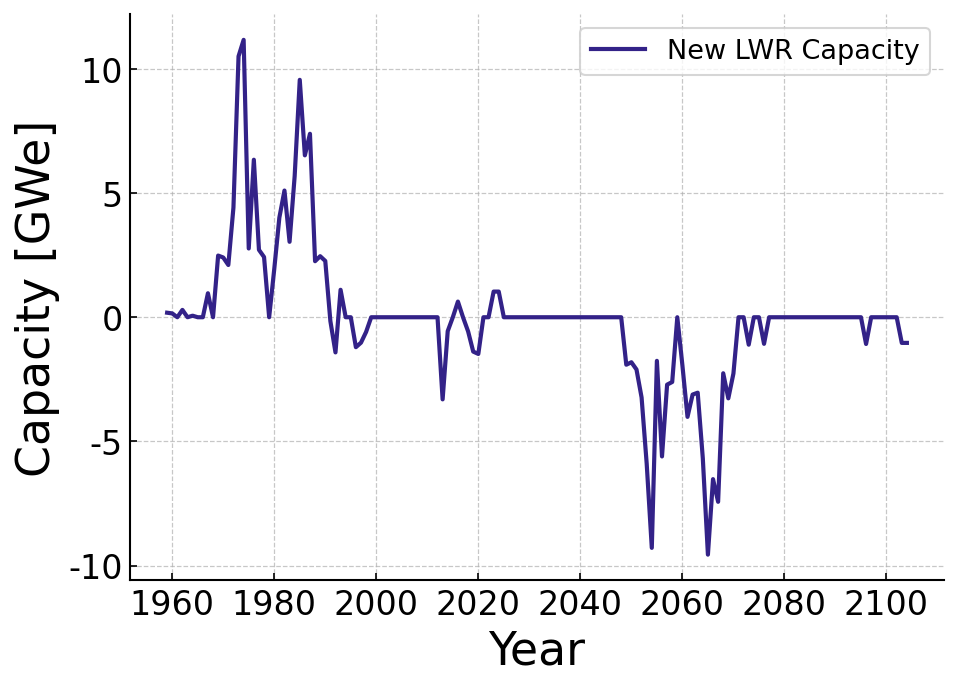

In [8]:
# Convert to a pandas DataFrame and plot.
capacity_change_df = pd.DataFrame(capacity_change.values(), index=capacity_change.keys(), columns=['new_LWR_Capacity'])
capacity_change_df.plot()

# Convert from MWe to GWe
plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])

plt.xlabel('Year')
plt.ylabel('Capacity [GWe]')

legend = plt.legend()
legend.get_texts()[0].set_text('New LWR Capacity')

In [9]:
# create a total lwr capacity column
capacity_change_df['Total LWR Capacity'] = capacity_change_df['new_LWR_Capacity'].cumsum()

/home/nsryan/anaconda3/envs/cyclus/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


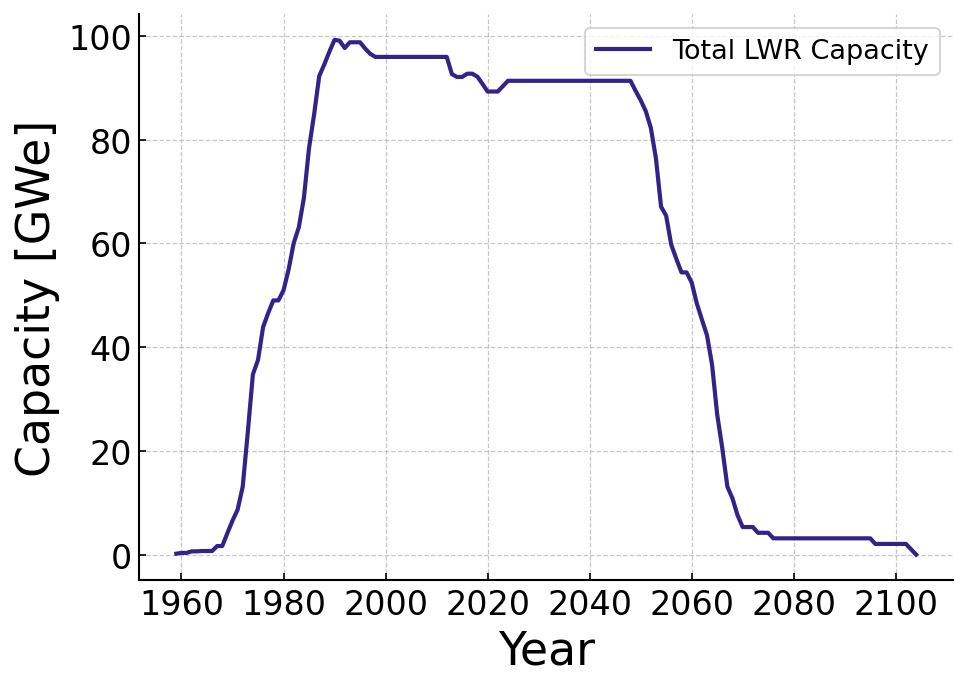

In [10]:
capacity_change_df[["Total LWR Capacity"]].plot()

# Convert from MWe to GWe
plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])

plt.xlabel('Year')
plt.ylabel('Capacity [GWe]')

legend = plt.legend()
legend.get_texts()[0].set_text('Total LWR Capacity')

## Capacity Expansion Calculations
In this section, I will perform the calculations required to do the energy demand increase. We will use the capacity from the transition_year variable in `scenario_definitions.py`

In [11]:
base_capacity = capacity_change_df.loc[sd.transition_year, 'Total LWR Capacity'] # in MWe

print(f"Total LWR capacity in {sd.transition_year}: {base_capacity} MWe")

Total LWR capacity in 2029: 91345.6 MWe


In [12]:
def capacity_increase(df, base_col, rate, start_year=sd.transition_year, end_year=sd.sim_end_yr):
    """
    This function takes in an increase rate, and creates a new column in the dataframe populated with the increased capacity.

    Parameters
    ----------
    df : pandas DataFrame
        The dataframe to add the new column to.
    base_col : str
        The name of the column to use as the base capacity.
        This column should contain the net capacity.
    rate : float
        The percentage of change in capacity year-to-year
        (e.g. 1.01 for a 1% increase).
    start_year : int
        The year to start the increase.
    end_year : int
        The year to end the increase.

    Returns
    -------
    df : pandas DataFrame
        The dataframe with the new column added.
    """
    for year in range(start_year, end_year):
        df.loc[year, f"{base_col} Inc {rate}"] = \
            df.loc[start_year, base_col] * (rate)**(year - start_year)

    for year in range(df.index[0], start_year):
        df.loc[year, f"{base_col} Inc {rate}"] = df.loc[year, base_col]

    df[f"New Capacity Inc {rate}"] = df[f"{base_col} Inc {rate}"] - df[base_col]
    return df

In [13]:
test_df = capacity_change_df.copy()
capacity_increase(test_df, 'Total LWR Capacity', 1.01)

,new_LWR_Capacity,Total LWR Capacity,Total LWR Capacity Inc 1.01,New Capacity Inc 1.01
1959,182.225,1.822250e+02,182.225000,0.000000
1960,154.475,3.367000e+02,336.700000,0.000000
1961,0.000,3.367000e+02,336.700000,0.000000
1962,296.000,6.327000e+02,632.700000,0.000000
1963,0.000,6.327000e+02,632.700000,0.000000
...,...,...,...,...
2100,0.000,2.066450e+03,185142.093984,183075.643984
2101,0.000,2.066450e+03,186993.514923,184927.064923
2102,0.000,2.066450e+03,188863.450073,186797.000073
2103,-1033.225,1.033225e+03,190752.084573,189718.859573


/home/nsryan/anaconda3/envs/cyclus/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


Text(0, 0.5, 'Capacity [GWe]')

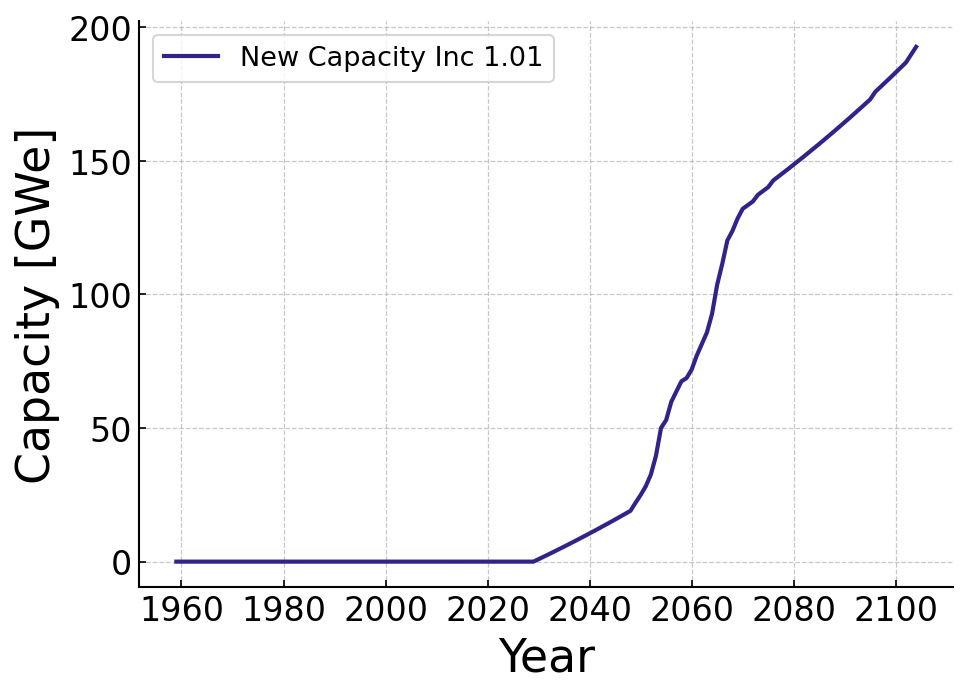

In [14]:
test_df[['New Capacity Inc 1.01']].plot()

# Convert from MWe to GWe
plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])

plt.xlabel('Year')
plt.ylabel('Capacity [GWe]')

# No Growth Scenarios
Growth Rate: 1

In this section, we will use the functions in `reactor_deployment.py` to deploy the advanced reactors to meet demand.

In [15]:
no_growth_cap_df = capacity_change_df.copy()
capacity_increase(no_growth_cap_df, 'Total LWR Capacity', 1)

,new_LWR_Capacity,Total LWR Capacity,Total LWR Capacity Inc 1,New Capacity Inc 1
1959,182.225,1.822250e+02,182.225,0.000
1960,154.475,3.367000e+02,336.700,0.000
1961,0.000,3.367000e+02,336.700,0.000
1962,296.000,6.327000e+02,632.700,0.000
1963,0.000,6.327000e+02,632.700,0.000
...,...,...,...,...
2100,0.000,2.066450e+03,91345.600,89279.150
2101,0.000,2.066450e+03,91345.600,89279.150
2102,0.000,2.066450e+03,91345.600,89279.150
2103,-1033.225,1.033225e+03,91345.600,90312.375


/home/nsryan/anaconda3/envs/cyclus/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


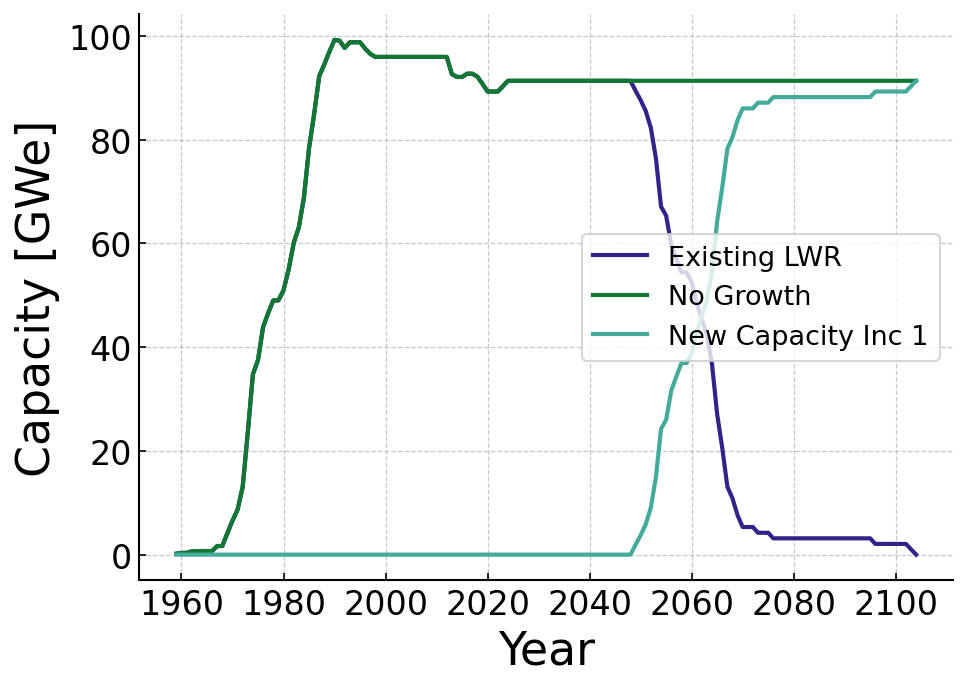

In [17]:
no_growth_cap_df[['Total LWR Capacity','Total LWR Capacity Inc 1','New Capacity Inc 1']].plot()

# Convert from MWe to GWe
plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])

plt.xlabel('Year')
plt.ylabel('Capacity [GWe]')

legend = plt.legend()
legend.get_texts()[0].set_text('Existing LWR')
legend.get_texts()[1].set_text('No Growth')

## Greedy Deployment

In [18]:
greedy_no_growth_cap_df = no_growth_cap_df.copy()

In [19]:
greedy_no_growth_cap_df

,new_LWR_Capacity,Total LWR Capacity,Total LWR Capacity Inc 1,New Capacity Inc 1
1959,182.225,1.822250e+02,182.225,0.000
1960,154.475,3.367000e+02,336.700,0.000
1961,0.000,3.367000e+02,336.700,0.000
1962,296.000,6.327000e+02,632.700,0.000
1963,0.000,6.327000e+02,632.700,0.000
...,...,...,...,...
2100,0.000,2.066450e+03,91345.600,89279.150
2101,0.000,2.066450e+03,91345.600,89279.150
2102,0.000,2.066450e+03,91345.600,89279.150
2103,-1033.225,1.033225e+03,91345.600,90312.375


In [20]:
greedy_no_growth_cap_df = greedy_no_growth_cap_df.reset_index().rename(columns={'index':'Year'})

In [21]:
dep.greedy_deployment(greedy_no_growth_cap_df, "New Capacity Inc 1", sd.ad_reactors, sd.transition_year)

,Year,new_LWR_Capacity,Total LWR Capacity,Total LWR Capacity Inc 1,New Capacity Inc 1,num_Xe100,num_MMR,Xe100Decom,MMRDecom,total_cap,new_cap,new_Xe100_cap,Xe100_cap,new_MMR_cap,MMR_cap
0,1959,182.225,1.822250e+02,182.225,0.000,0,0,0,0,0,0,0,0,0,0
1,1960,154.475,3.367000e+02,336.700,0.000,0,0,0,0,0,0,0,0,0,0
2,1961,0.000,3.367000e+02,336.700,0.000,0,0,0,0,0,0,0,0,0,0
3,1962,296.000,6.327000e+02,632.700,0.000,0,0,0,0,0,0,0,0,0,0
4,1963,0.000,6.327000e+02,632.700,0.000,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2100,0.000,2.066450e+03,91345.600,89279.150,1115,37,0,22,89385,89275,89200,89200,75,185
142,2101,0.000,2.066450e+03,91345.600,89279.150,1115,24,0,9,89320,89275,89200,89200,75,120
143,2102,0.000,2.066450e+03,91345.600,89279.150,1115,23,0,8,89315,89275,89200,89200,75,115
144,2103,-1033.225,1.033225e+03,91345.600,90312.375,1128,37,0,23,90425,90310,90240,90240,70,185


/home/nsryan/anaconda3/envs/cyclus/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


Text(0, 0.5, 'Capacity [GWe]')

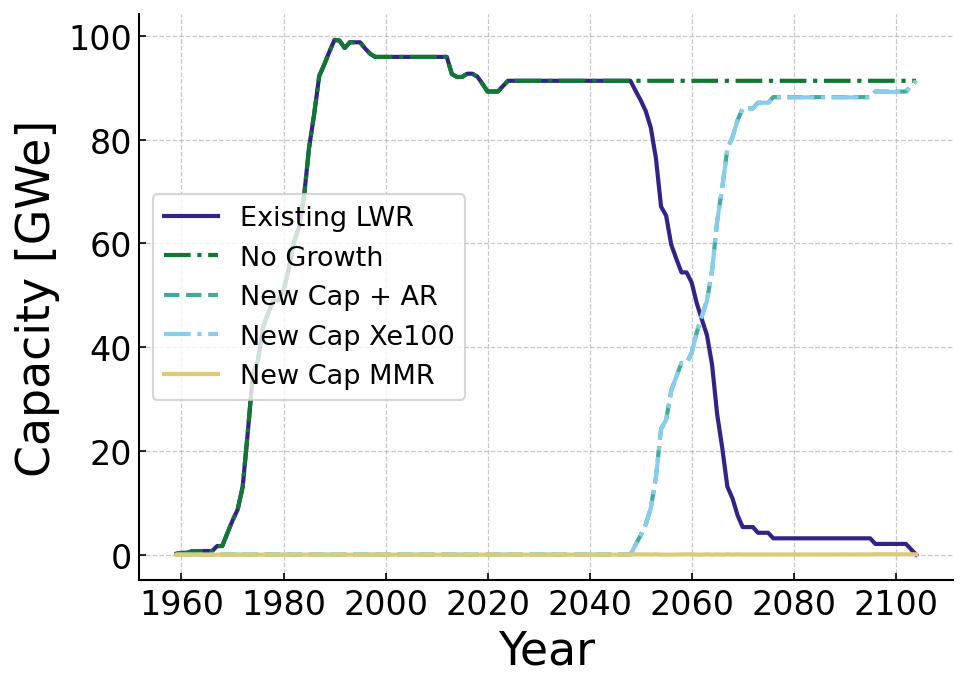

In [22]:
e = ['Year','new_Xe100_cap','new_MMR_cap']
es = ['-','-']

f = ['Year','new_MMR_cap']
fs = ['-']

g = ['Year','Total LWR Capacity','Total LWR Capacity Inc 1','new_cap','new_Xe100_cap','new_MMR_cap']
gs = ['-','-.','--','-.','-']

h = ['Year','num_Xe100', 'num_MMR']
hs = ['-','-']

greedy_no_growth_cap_df[g].plot(x='Year', logy=False, style=gs)


plt.xlabel('Year')

legend = plt.legend()
# g
legend.get_texts()[0].set_text('Existing LWR')
legend.get_texts()[1].set_text('No Growth')
legend.get_texts()[2].set_text('New Cap + AR')
legend.get_texts()[3].set_text('New Cap Xe100')
legend.get_texts()[4].set_text('New Cap MMR')
# Convert from MWe to GWe
plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])
plt.ylabel('Capacity [GWe]')

# e
# legend.get_texts()[1].set_text('New Cap MMR')
# # Convert from MWe to GWe
# plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])
# plt.ylabel('Capacity [GWe]')

# f
# legend.get_texts()[3].set_text('New Cap Xe100')
# legend.get_texts()[4].set_text('New Cap MMR')
# # Convert from MWe to GWe
# plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])
# plt.ylabel('Capacity [GWe]')

# h
# legend.get_texts()[0].set_text('Xe-100')
# legend.get_texts()[1].set_text('MMR')
# plt.ylabel('Number of Reactors [#]')

In [30]:
dep.analyze_algorithm(greedy_no_growth_cap_df, "Total LWR Capacity Inc 1", "new_cap", sd.ad_reactors)

{'above_count': 0,
 'below_count': 146,
 'equal_count': 0,
 'above_percentage': 0.0,
 'below_percentage': 100.0,
 'total_above': 0.0,
 'total_below': -7772443.999999999,
 'percent_provided': {'Xe100': 99.89685129012294, 'MMR': 0.10314870987706559}}

## Pre Determined Distribution
This section I will skip at the moment as I have not put enough thought into scenarios that would be of interested based on what companies are saying. At present, I think staggering the initial deployment of each technology is the most i can say about the distribution of any specific reactor technology based on the deadlines they are trying to meet.

## Rough Random Deployment
I will only use the rough case as I am not confident the true random case will converge. 

Tolerance will be 5, and the seed will be set for now with the `True` argument.

In [24]:
rrd_no_growth_cap_df = no_growth_cap_df.copy()

In [25]:
rrd_no_growth_cap_df

,new_LWR_Capacity,Total LWR Capacity,Total LWR Capacity Inc 1,New Capacity Inc 1
1959,182.225,1.822250e+02,182.225,0.000
1960,154.475,3.367000e+02,336.700,0.000
1961,0.000,3.367000e+02,336.700,0.000
1962,296.000,6.327000e+02,632.700,0.000
1963,0.000,6.327000e+02,632.700,0.000
...,...,...,...,...
2100,0.000,2.066450e+03,91345.600,89279.150
2101,0.000,2.066450e+03,91345.600,89279.150
2102,0.000,2.066450e+03,91345.600,89279.150
2103,-1033.225,1.033225e+03,91345.600,90312.375


In [26]:
rrd_no_growth_cap_df = rrd_no_growth_cap_df.reset_index().rename(columns={'index':'Year'})

In [27]:
dep.rand_deployment(rrd_no_growth_cap_df, "New Capacity Inc 1", sd.ad_reactors, sd.transition_year, set_seed=True, rough=True, tolerance=5)

,Year,new_LWR_Capacity,Total LWR Capacity,Total LWR Capacity Inc 1,New Capacity Inc 1,num_Xe100,num_MMR,Xe100Decom,MMRDecom,total_cap,new_cap,new_Xe100_cap,Xe100_cap,new_MMR_cap,MMR_cap
0,1959,182.225,1.822250e+02,182.225,0.000,0,0,0,0,0,0,0,0,0,0
1,1960,154.475,3.367000e+02,336.700,0.000,0,0,0,0,0,0,0,0,0,0
2,1961,0.000,3.367000e+02,336.700,0.000,0,0,0,0,0,0,0,0,0,0
3,1962,296.000,6.327000e+02,632.700,0.000,0,0,0,0,0,0,0,0,0,0
4,1963,0.000,6.327000e+02,632.700,0.000,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2100,0.000,2.066450e+03,91345.600,89279.150,1047,2667,0,1570,97095,89245,83760,83760,5485,13335
142,2101,0.000,2.066450e+03,91345.600,89279.150,1047,2715,0,1618,97335,89245,83760,83760,5485,13575
143,2102,0.000,2.066450e+03,91345.600,89279.150,1047,2746,0,1649,97490,89245,83760,83760,5485,13730
144,2103,-1033.225,1.033225e+03,91345.600,90312.375,1058,2814,0,1690,98710,90260,84640,84640,5620,14070


Text(0, 0.5, 'Capacity [GWe]')

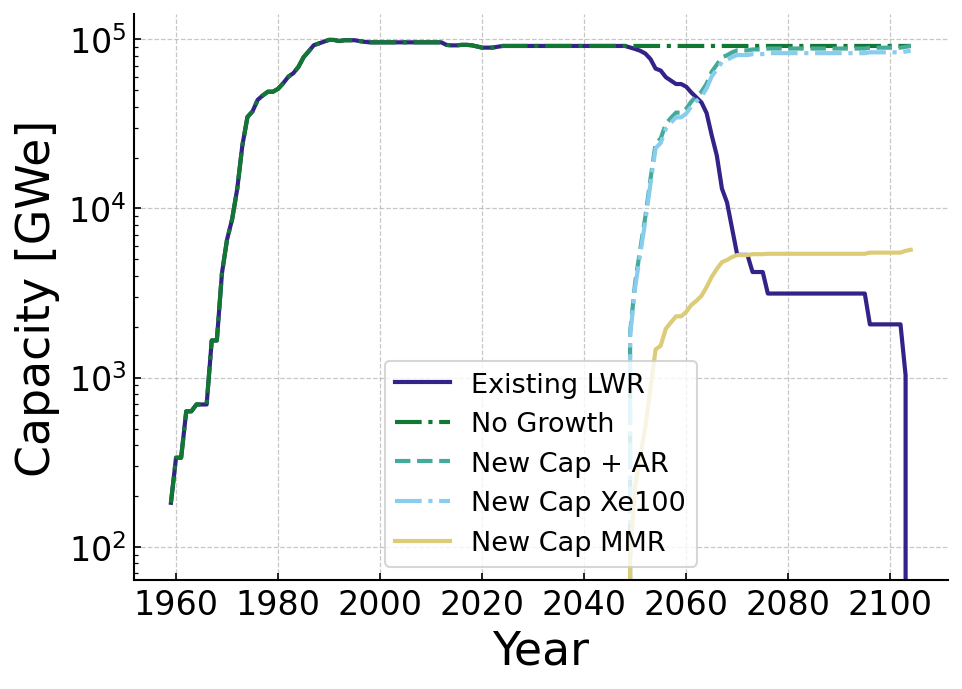

In [28]:
g = ['Year','Total LWR Capacity','Total LWR Capacity Inc 1','new_cap','new_Xe100_cap','new_MMR_cap']
gs = ['-','-.','--','-.','-']

e = ['Year','new_Xe100_cap','new_MMR_cap']
es = ['-','-']

f = ['Year','new_MMR_cap']
fs = ['-']

h = ['Year','num_Xe100', 'num_MMR']
hs = ['-','-']

rrd_no_growth_cap_df[g].plot(x='Year', logy=True, style=gs)

plt.xlabel('Year')

legend = plt.legend()
# g
legend.get_texts()[0].set_text('Existing LWR')
legend.get_texts()[1].set_text('No Growth')
legend.get_texts()[2].set_text('New Cap + AR')
legend.get_texts()[3].set_text('New Cap Xe100')
legend.get_texts()[4].set_text('New Cap MMR')
# Convert from MWe to GWe
# plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])
plt.ylabel('Capacity [GWe]')

# e
# legend.get_texts()[1].set_text('New Cap MMR')
# # Convert from MWe to GWe
# plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])
# plt.ylabel('Capacity [GWe]')

# f
# legend.get_texts()[3].set_text('New Cap Xe100')
# legend.get_texts()[4].set_text('New Cap MMR')
# # Convert from MWe to GWe
# plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])
# plt.ylabel('Capacity [GWe]')

# h
# legend.get_texts()[0].set_text('Xe-100')
# legend.get_texts()[1].set_text('MMR')
# plt.ylabel('Number of Reactors [#]')

In [29]:
dep.analyze_algorithm(rrd_no_growth_cap_df, "Total LWR Capacity Inc 1", "new_cap", sd.ad_reactors)

{'above_count': 0,
 'below_count': 146,
 'equal_count': 0,
 'above_percentage': 0.0,
 'below_percentage': 100.0,
 'total_above': 0.0,
 'total_below': -4758269.0,
 'percent_provided': {'Xe100': 88.24742268041237, 'MMR': 11.752577319587632}}

## Rough Random + Greedy

In [31]:
rr_pgd_no_growth_cap_df = no_growth_cap_df.copy()

In [32]:
rr_pgd_no_growth_cap_df = rr_pgd_no_growth_cap_df.reset_index().rename(columns={'index':'Year'})

In [33]:
dep.rand_greedy_deployment(rr_pgd_no_growth_cap_df, "New Capacity Inc 1", sd.ad_reactors, sd.transition_year, set_seed=True)

,Year,new_LWR_Capacity,Total LWR Capacity,Total LWR Capacity Inc 1,New Capacity Inc 1,num_Xe100,num_MMR,Xe100Decom,MMRDecom,total_cap,new_cap,new_Xe100_cap,Xe100_cap,new_MMR_cap,MMR_cap,remaining_cap,greedy_num_Xe100,rand_num_Xe100,greedy_num_MMR,rand_num_MMR
0,1959,182.225,1.822250e+02,182.225,0.000,0,0,0,0,0,0,0,0,0,0,0.000,0,0,0,0
1,1960,154.475,3.367000e+02,336.700,0.000,0,0,0,0,0,0,0,0,0,0,0.000,0,0,0,0
2,1961,0.000,3.367000e+02,336.700,0.000,0,0,0,0,0,0,0,0,0,0,0.000,0,0,0,0
3,1962,296.000,6.327000e+02,632.700,0.000,0,0,0,0,0,0,0,0,0,0,0.000,0,0,0,0
4,1963,0.000,6.327000e+02,632.700,0.000,0,0,0,0,0,0,0,0,0,0,0.000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2100,0.000,2.066450e+03,91345.600,89279.150,1047,4737,0,2064,204540,107445,83760,83760,13365,23685,34.150,0,1047,2070,2667
142,2101,0.000,2.066450e+03,91345.600,89279.150,1047,4884,0,2163,205515,108180,83760,83760,13605,24420,34.150,0,1047,2169,2715
143,2102,0.000,2.066450e+03,91345.600,89279.150,1047,4977,0,2225,206135,108645,83760,83760,13760,24885,34.150,0,1047,2231,2746
144,2103,-1033.225,1.033225e+03,91345.600,90312.375,1058,5137,0,2313,209035,110325,84640,84640,14120,25685,52.375,0,1058,2323,2814


Text(0, 0.5, 'Capacity [GWe]')

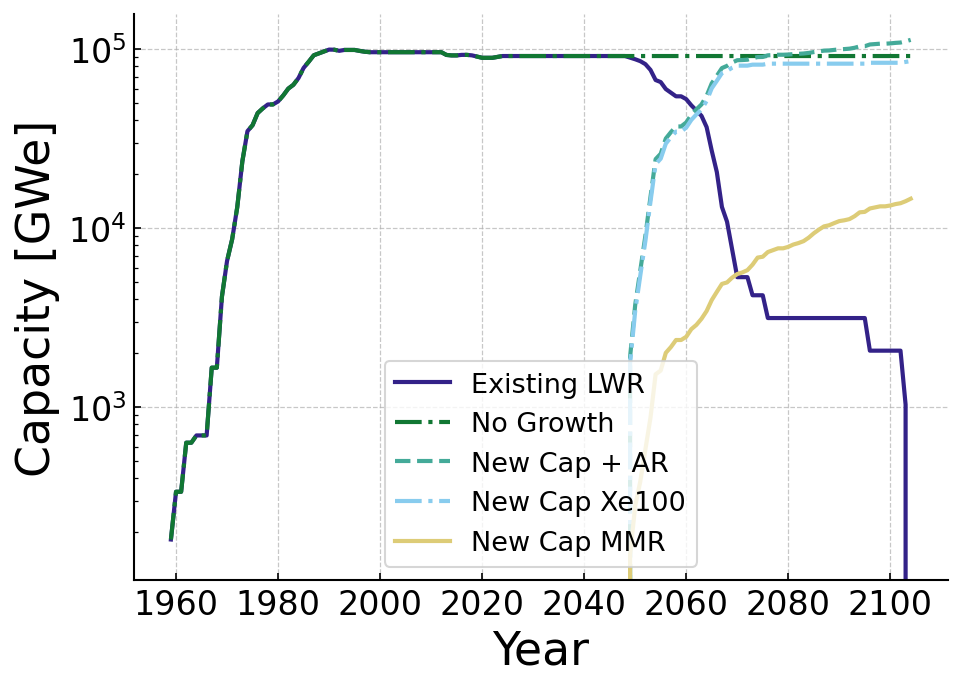

In [34]:
g = ['Year','Total LWR Capacity','Total LWR Capacity Inc 1','new_cap','new_Xe100_cap','new_MMR_cap']
gs = ['-','-.','--','-.','-']

e = ['Year','new_Xe100_cap','new_MMR_cap']
es = ['-','-']

f = ['Year','new_MMR_cap']
fs = ['-']

h = ['Year','num_Xe100', 'num_MMR']
hs = ['-','-']

rr_pgd_no_growth_cap_df[g].plot(x='Year', logy=True, style=gs)

plt.xlabel('Year')

legend = plt.legend()
# g
legend.get_texts()[0].set_text('Existing LWR')
legend.get_texts()[1].set_text('No Growth')
legend.get_texts()[2].set_text('New Cap + AR')
legend.get_texts()[3].set_text('New Cap Xe100')
legend.get_texts()[4].set_text('New Cap MMR')
# Convert from MWe to GWe
# plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])
plt.ylabel('Capacity [GWe]')

# e
# legend.get_texts()[1].set_text('New Cap MMR')
# # Convert from MWe to GWe
# plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])
# plt.ylabel('Capacity [GWe]')

# f
# legend.get_texts()[3].set_text('New Cap Xe100')
# legend.get_texts()[4].set_text('New Cap MMR')
# # Convert from MWe to GWe
# plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])
# plt.ylabel('Capacity [GWe]')

# h
# legend.get_texts()[0].set_text('Xe-100')
# legend.get_texts()[1].set_text('MMR')
# plt.ylabel('Number of Reactors [#]')

In [35]:
dep.analyze_algorithm(rr_pgd_no_growth_cap_df, "Total LWR Capacity Inc 1", "new_cap", sd.ad_reactors)

{'above_count': 29,
 'below_count': 117,
 'equal_count': 0,
 'above_percentage': 19.863013698630137,
 'below_percentage': 80.13698630136986,
 'total_above': 261552.59999999983,
 'total_below': -7683536.599999997,
 'percent_provided': {'Xe100': 44.05170294434498, 'MMR': 7.092376333981543}}

# graveyard 

In [ ]:
desired_cap_increase = [1.01, 1.05, 1.10, 1.15, 2.00, 3.00]

# %%
# create the dataframe for the expansion of capacity
cap_expand_df = pd.DataFrame(data=cap_need_df, columns=['Year'])

# pull the indices for the start and end of capacity expansion
exp_start_ind = cap_expand_df.index[cap_expand_df['Year']==transition_year].to_list()[0]
exp_end_ind = len(cap_expand_df['Year'])

# iterate through the years of expansion
for cap_inc in desired_cap_increase:
    years_of_exp = 0
    cap_expand_df[f'ExpandedCapacity{cap_inc}'] = 0
    for year in range(exp_start_ind, exp_end_ind):
        # get the additional capacity for each year
        cap_expand_df.loc[year, f'ExpandedCapacity{cap_inc}'] = base_capacity * (cap_inc ** years_of_exp) - base_capacity * (cap_inc ** (years_of_exp - 1))
        years_of_exp += 1

# %%
cap_expand_df[['Year','ExpandedCapacity1.01','ExpandedCapacity1.05','ExpandedCapacity1.1','ExpandedCapacity1.15', 'ExpandedCapacity2.0', 'ExpandedCapacity3.0']].plot(x='Year', logy=True)

plt.xlim(2025,2096)
plt.ylabel('Expanded Capacity [MWe]')
plt.xlabel('Year [#]')

# %% [markdown]
# ### Deploy individual reactor models to meet capacity

# %%
for cap_inc in desired_cap_increase:
    for reactor in ad_reactors.keys():
        cap_expand_df[f'Expand{reactor}{cap_inc}'] = cap_expand_df.loc[cap_expand_df['Year']>transition_year, f'ExpandedCapacity{cap_inc}'] * ad_reactors[reactor][1]/ad_reactors[reactor][0]

        # set the number of reactors before the transition year to zero
        cap_expand_df.loc[cap_expand_df['Year']<=transition_year, f'Expand{reactor}{cap_inc}'] = 0

        # make the number of reactors an int
        cap_expand_df[f'Expand{reactor}{cap_inc}'] = cap_expand_df[f'Expand{reactor}{cap_inc}'].apply(lambda x: math.ceil(x))

# %%
# now we are going to note when reactors are decommissioned
for cap_inc in desired_cap_increase:
    for reactor in ad_reactors.keys():
        # create a decommissioning column
        cap_expand_df[f'Expand{reactor}{cap_inc}Decom'] = 0
        for year in range(len(cap_expand_df['Year'])):
            decom_year = year + ad_reactors[reactor][2]
            if decom_year >= len(cap_expand_df['Year']):
                pass
            else:
                # tracks the number of decommissioned reactors
                try:
                    cap_expand_df.loc[decom_year, f'Expand{reactor}{cap_inc}Decom'] += cap_expand_df.loc[year, f'Expand{reactor}{cap_inc}']
                except OverflowError:
                    cap_expand_df[f'Expand{reactor}{cap_inc}Decom'] = cap_expand_df[f'Expand{reactor}{cap_inc}Decom'].astype(np.int64)

                # construct new reactors to replace the decommissioned ones
                cap_expand_df.loc[decom_year, f'Expand{reactor}{cap_inc}'] += cap_expand_df.loc[year, f'Expand{reactor}{cap_inc}']

# %%
# create total reactor columns for each of the advanced reactors
for cap_inc in desired_cap_increase:
    for reactor in ad_reactors.keys():
        cap_expand_df[f'TotalExpand{reactor}{cap_inc}'] = cap_expand_df[f'Expand{reactor}{cap_inc}'].cumsum() - cap_expand_df[f'Expand{reactor}{cap_inc}Decom'].cumsum()


In [1]:
import camelot
tables = camelot.read_pdf("https://fuelcycleoptions.inl.gov/SiteAssets/SitePages/Home/Evaluation%20of%20NPP%20and%20CPP%20Sites%20Aug%2016%202024.pdf", pages='17')

Ignoring wrong pointing object 7 0 (offset 0)
Ignoring wrong pointing object 9 0 (offset 0)
Ignoring wrong pointing object 11 0 (offset 0)
Ignoring wrong pointing object 13 0 (offset 0)
Ignoring wrong pointing object 15 0 (offset 0)
Ignoring wrong pointing object 17 0 (offset 0)
Ignoring wrong pointing object 19 0 (offset 0)
Ignoring wrong pointing object 21 0 (offset 0)
Ignoring wrong pointing object 28 0 (offset 0)
Ignoring wrong pointing object 30 0 (offset 0)
Ignoring wrong pointing object 35 0 (offset 0)
Ignoring wrong pointing object 37 0 (offset 0)
Ignoring wrong pointing object 39 0 (offset 0)
Ignoring wrong pointing object 44 0 (offset 0)
Ignoring wrong pointing object 46 0 (offset 0)
Ignoring wrong pointing object 48 0 (offset 0)
Ignoring wrong pointing object 53 0 (offset 0)
Ignoring wrong pointing object 68 0 (offset 0)
Ignoring wrong pointing object 73 0 (offset 0)
Ignoring wrong pointing object 78 0 (offset 0)
Ignoring wrong pointing object 95 0 (offset 0)
Ignoring wrong 

In [2]:
tables[0].df

,0,1,2,3,4,5,6
0,Plant state,Number of \nsites,Number of \nunits,Sites with \nplanned \nadditional \nreactor,Sites that \nconsidered a \nCOL *,Estimated sites \nwith space for \nadditional ...,Estimated sites \nwith space for \nadditional ...
1,AL,2,5,0,0,2,2
2,AR,1,2,0,0,0,1
3,AZ,1,3,1,0,0,1
4,CA,1,2,0,0,0,0
5,CT,1,2,0,0,0,0
6,FL,2,4,0,1,0,2
7,GA,2,6,0,0,2,2
8,IL,6,11,1,0,4,6
9,KS,1,1,0,0,1,1


In [3]:
current_op_data = tables[0].df

In [4]:
header = current_op_data.loc[0]
current_op_data = current_op_data[1:]
current_op_data.columns = header

In [5]:
current_op_data

,Plant state,Number of \nsites,Number of \nunits,Sites with \nplanned \nadditional \nreactor,Sites that \nconsidered a \nCOL *,Estimated sites \nwith space for \nadditional 1117 \nMWe reactor,Estimated sites \nwith space for \nadditional \n600 MWe reactor
1,AL,2,5,0,0,2,2
2,AR,1,2,0,0,0,1
3,AZ,1,3,1,0,0,1
4,CA,1,2,0,0,0,0
5,CT,1,2,0,0,0,0
6,FL,2,4,0,1,0,2
7,GA,2,6,0,0,2,2
8,IL,6,11,1,0,4,6
9,KS,1,1,0,0,1,1
10,LA,2,2,1,0,1,2


In [ ]:
current_op_data = current_op_data.rename(columns={'Number of \nsites': 'number_of_sites'})
current_op_data = current_op_data.rename(columns={'Number of \nunits': 'number_of_units'})
current_op_data = current_op_data.rename(columns={'Estimated sites \nwith space for \nadditional 1117 \nMWe reactor': 'number_of_large'})
current_op_data = current_op_data.rename(columns={'Estimated sites \nwith space for \nadditional \n600 MWe reactor': 'number_of_small'})
current_op_data

In [67]:
current_operating_data

,Plant state,number_of_sites
1,AL,2
2,AR,1
3,AZ,1
4,CA,1
5,CT,1
6,FL,2
7,GA,2
8,IL,6
9,KS,1
10,LA,2


In [50]:
# Transpose the DataFrame to make the first row the column headers
df = current_op_data.transpose()

# Set the first row as the column headers
df.columns = df.iloc[1]

# Drop the first row
df = df[1:]

# Reset the index
df.reset_index(drop=True, inplace=True)


In [51]:
df

1,Number of \nsites,2,1,1,1,1,2,2,6,1,...,3,2,4,4,2,2,2,1,1,54
0,Number of \nsites,2,1,1,1,1,2,2,6,1,...,3,2,4,4,2,2,2,1,1,54
1,Number of \nunits,5,2,3,2,2,4,6,11,1,...,4,2,8,7,4,4,4,1,2,94
2,Sites with \nplanned \nadditional \nreactor,0,0,1,0,0,0,0,1,0,...,0,2,0,0,0,0,2,1,0,13
3,Sites that \nconsidered a \nCOL *,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,2,0,0,0,7
4,Estimated sites \nwith space for \nadditional ...,2,0,0,0,0,0,2,4,1,...,0,0,2,1,1,0,0,0,1,17
5,Estimated sites \nwith space for \nadditional ...,2,1,1,0,0,2,2,6,1,...,2,2,2,2,1,2,2,1,1,41


In [46]:
g = df.loc[0].index.to_list()

In [47]:
g

['Plant state',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CT',
 'FL',
 'GA',
 'IL',
 'KS',
 'LA',
 'MD',
 'MI',
 'MN',
 'MO',
 'MS',
 'NC',
 'NE',
 'NH',
 'NJ',
 'NY',
 'OH',
 'PA',
 'SC',
 'TN',
 'TX',
 'VA',
 'WA',
 'WI',
 'Total']

In [49]:
df.loc[0].values

array(['Number of \nsites', '2', '1', '1', '1', '1', '2', '2', '6', '1',
       '2', '1', '2', '2', '1', '1', '3', '1', '1', '2', '3', '2', '4',
       '4', '2', '2', '2', '1', '1', '54'], dtype=object)